---
# 1.1 Scientific computing
---

## Motivation

- Computers have become a central tool that is used in virtually every discipline:  

    - mathematics
    - engineering
    - physical sciences
    - social sciences
    - economics
    - data science
    - ...

- In these disciplines, **mathematical models** are used to explore and gain a deeper understanding of complex systems.

- There will always be a need for those with the ability to develop and use software that can _efficiently_, _accurately_, and _reliably_ solve mathematical models.

## Overview

In this class, we will learn computational methods (algorithms) for working with _continuous_ mathematical models:
    
| Chapter | Topic |
|:--------:|-------|
|  3 | Nonlinear Equations in One Variable |
| 10 | Polynomial Interpolation |
| 11 | Piecewise Polynomial Interpolation |
| 12 | Best Approximation |
| 14 | Numerical Differentiation |
| 15 | Numerical Integration |
| 16 | Differential Equations |

## Goals

Learning these algorithms will give you the knowledge and skills to solve more complex problems you may encounter in your careers. We will study:

1. The theory behind the algorithms (numerical analysis):
    - complexity
    - rate of convergence
    - problem conditioning
    - algorithm stability
    - accuracy
    - error bounds
    - proofs
2. How to choose which method should be used for a particular problem.
3. How to implement the method efficiently.
    - We will use [Julia](http://julialang.org): "a high-level, high-performance dynamic programming language for technical computing."
    - See [Julia benchmarks](http://julialang.org/benchmarks/) for a comparison with various other languages.
4. How to evaluate and test your implementation for *efficiency*, *accuracy*, and *robustness*.

---
# Section 1.2: Numerical algorithms and errors
---

Suppose some quantity $u$ is approximated by $v$. The **absolute error** is measured by

$$
|u - v|.
$$

Often, it is better to look at how large $|u-v|$ is compared to $|u|$.

If $|u-v|$ is $p$ percent of $|u|$, then 

$$
|u-v| = p|u|.
$$ 

If $u \ne 0$, then
$$
p = \frac{|u-v|}{|u|},
$$
which is called the **relative error**.

In [1]:
u, v = π, 3.14159
#u = π
#v = 3.14159

(π, 3.14159)

In [2]:
abs(u - v)

2.6535897932333796e-6

i.e., $\approx 2.6 \times 10^{-6}$

In [3]:
p = abs(u - v)/abs(u)

8.446638650625857e-7

i.e., $\approx 8.4 \times 10^{-7} = (8.4 \times 10^{-5})\%$

In [4]:
# Number of digits of accuracy
-log10(p)

6.0733160846496

---

## Exercise
Complete the following table.

| $u$ | $v$ | absolute error | relative error |
|:---:|:---:|:--------------:|:--------------:|
|   1 |  0.99 | 0.01 | 0.01 |
|   1 |  1.5  | 0.5 | 0.5 |
| 100 | 99.99 | 0.01 | 0.0001 |
| 100 | 100.5 | 0.5 | 0.005 |

In [5]:
abs(1 - 0.99)/abs(1)

0.010000000000000009

In [6]:
abs(1 - 1.5)/abs(1)

0.5

In [7]:
abs(100 - 99.99)/abs(100)

0.00010000000000005117

In [8]:
abs(100 - 100.5)/abs(100)

0.005

---

## Error types

1. Errors in mathematical model or in the data
2. Approximation errors
3. Roundoff errors
    - due to the finite precision of real numbers stored on a computer

## Approximation Error (approximating the derivative)

Consider the formula for the derivative of a differentiable function $f \colon \mathbb{R} \to \mathbb{R}$ at $x_0$:

$$ f'(x_0) = \lim_{h \to 0} \frac{f(x_0 + h) - f(x_0)}{h}.$$

It is therefore reasonable to approximate $f'(x_0)$ using

$$\frac{f(x_0 + h) - f(x_0)}{h}$$

for some small positive $h$. The error in this approximation is 

$$\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right|$$

and is called a **discretization error**.

---

## Example

Let's computationally examine this approximation error using

$$
f(x) = \sin(x) \quad \text{and} \quad x_0 = 1.
$$

Note that $f'(x) = \cos(x)$.

In [19]:
f(x) = sin(x)

f (generic function with 1 method)

Another way to define the function $f$ in Julia:
```julia
function f(x)
    return sin(x)
end
```

In [20]:
x0 = 1.0
fp = cos(x0)

0.5403023058681398

Thus 

$$f'(x_0) = \cos(1) = 0.5403023058681398\ldots.$$ 

Let's write some **Julia** code to approximate this value using 

$$ 
f'(x_0) \approx \frac{f(x_0 + h) - f(x_0)}{h}
$$

for $h = 10^{-1},10^{-2},\ldots,10^{-16}$.

In [21]:
h = 1e-8
fpapprox = (f(x0+h) - f(x0))/h
abserr = abs(fp - fpapprox)
relerr = abserr/abs(fp)
numdigits = -log10(relerr)

8.259897154981193

In [22]:
using Printf

@printf "%8s %20s %8s %8s %10s\n" "h" "fpapprox" "abserr" "relerr" "numdigits"
for k = 1:16
    h = 10.0^-k
    fpapprox = (f(x0+h) - f(x0))/h
    abserr = abs(fp - fpapprox)
    relerr = abserr/abs(fp)
    numdigits = -log10(relerr)
    @printf "%8.1e %20.16f %8.1e %8.1e %10.1f\n" h fpapprox abserr relerr numdigits
end

       h             fpapprox   abserr   relerr  numdigits
 1.0e-01   0.4973637525353891  4.3e-02  7.9e-02        1.1
 1.0e-02   0.5360859810118689  4.2e-03  7.8e-03        2.1
 1.0e-03   0.5398814803603269  4.2e-04  7.8e-04        3.1
 1.0e-04   0.5402602314186211  4.2e-05  7.8e-05        4.1
 1.0e-05   0.5402980985058647  4.2e-06  7.8e-06        5.1
 1.0e-06   0.5403018851213304  4.2e-07  7.8e-07        6.1
 1.0e-07   0.5403022640404487  4.2e-08  7.7e-08        7.1
 1.0e-08   0.5403023028982545  3.0e-09  5.5e-09        8.3
 1.0e-09   0.5403023584094058  5.3e-08  9.7e-08        7.0
 1.0e-10   0.5403022473871033  5.8e-08  1.1e-07        7.0
 1.0e-11   0.5403011371640787  1.2e-06  2.2e-06        5.7
 1.0e-12   0.5403455460850637  4.3e-05  8.0e-05        4.1
 1.0e-13   0.5395683899678261  7.3e-04  1.4e-03        2.9
 1.0e-14   0.5440092820663267  3.7e-03  6.9e-03        2.2
 1.0e-15   0.5551115123125783  1.5e-02  2.7e-02        1.6
 1.0e-16   0.0000000000000000  5.4e-01  1.0e+00       -0

In [23]:
h = 1e-16
f(x0+h) - f(x0)

0.0

In [24]:
x0 + h, x0

(1.0, 1.0)

In [25]:
(x0+h) - x0

0.0

---

 ## Theorem: (Taylor Series)

Assume that $f$ is a function that is $(k+1)$-differentiable on an interval containing $x_0$ and $x_0 + h$. Then

$$
f(x_0 + h) = f(x_0) + h f'(x_0) + \frac{h^2}{2} f''(x_0) + \cdots + \frac{h^k}{k!} f^{(k)}(x_0) + \frac{h^{k+1}}{(k+1)!} f^{(k+1)}(\xi),
$$

for some $\xi \in (x_0, x_0 + h)$.

### Proof that the discretization error decreases at the same rate as $h$:

Solving for $f'(x_0)$ in the Taylor series expansion, we get

$$
f'(x_0) = \frac{f(x_0+h)-f(x_0)}{h} - \left(\frac{h}{2} f''(x_0) + \frac{h^2}{6} f'''(x_0)  + \cdots + \frac{h^{k}}{(k+1)!} f^{(k+1)}(\xi)\right).
$$

Therefore,

$$
\left|f'(x_0) - \frac{f(x_0+h)-f(x_0)}{h}\right| = \left|\frac{h}{2} f''(x_0) + \frac{h^2}{6} f'''(x_0) + \cdots + \frac{h^{k}}{(k+1)!} f^{(k+1)}(\xi)\right|.
$$

If $f''(x_0) \neq 0$ and $h$ is small, then the right-hand-side is dominated by $\frac{h}{2} f''(x_0)$. Thus,

$$
\left|f'(x_0) - \frac{f(x_0+h)-f(x_0)}{h}\right| \approx \frac{h}{2}\left| f''(x_0)\right| = \mathcal{O}(h). \quad \blacksquare
$$

(See p. 7 of Ascher-Greif for the rigorous definitions of Big-$\mathcal{O}$ and $\Theta$ notation).

## Example continued...

Recall that $f(x) = \sin(x)$. Thus $f''(x) = -\sin(x)$.

In [26]:
fpp = -sin(x0)

abs(fpp)/2

0.42073549240394825

Therefore, 
$$
\frac{\left|f''(x_0)\right|}{2} = 0.42073549240394825\ldots,
$$
which agrees very well with our numerical test.

---

## Exercise

What do you think will happen if $f''(x_0) = 0$? Write code to test your hypothesis.

In [27]:
using Printf

f(x) = sin(x)
x0 = pi
fp = cos(x0)

@printf "%8s %20s %8s %8s %10s\n" "h" "fpapprox" "abserr" "relerr" "numdigits"
for k = 1:16
    h = 10.0^-k
    fpapprox = (f(x0+h) - f(x0))/h
    abserr = abs(fp - fpapprox)
    relerr = abserr/abs(fp)
    numdigits = -log10(relerr)
    @printf "%8.1e %20.16f %8.1e %8.1e %10.1f\n" h fpapprox abserr relerr numdigits
end

       h             fpapprox   abserr   relerr  numdigits
 1.0e-01  -0.9983341664682811  1.7e-03  1.7e-03        2.8
 1.0e-02  -0.9999833334166328  1.7e-05  1.7e-05        4.8
 1.0e-03  -0.9999998333331090  1.7e-07  1.7e-07        6.8
 1.0e-04  -0.9999999983342189  1.7e-09  1.7e-09        8.8
 1.0e-05  -0.9999999999776380  2.2e-11  2.2e-11       10.7
 1.0e-06  -1.0000000000171467  1.7e-11  1.7e-11       10.8
 1.0e-07  -0.9999999971387727  2.9e-09  2.9e-09        8.5
 1.0e-08  -0.9999999816760610  1.8e-08  1.8e-08        7.7
 1.0e-09  -0.9999999602756910  4.0e-08  4.0e-08        7.4
 1.0e-10  -0.9999988580935718  1.1e-06  1.1e-06        5.9
 1.0e-11  -0.9999878362723796  1.2e-05  1.2e-05        4.9
 1.0e-12  -0.9999664359024263  3.4e-05  3.4e-05        4.5
 1.0e-13  -0.9979760753634935  2.0e-03  2.0e-03        2.7
 1.0e-14  -1.0091587146636705  9.2e-03  9.2e-03        2.0
 1.0e-15  -0.7657137397853898  2.3e-01  2.3e-01        0.6
 1.0e-16   1.2246467991473533  2.2e+00  2.2e+00       -0

---

## Roundoff Error

Numbers are stored in the computer using a finite precision representation. Roughly 16 digits of precision are possible using the 64-bit floating point format.

Whenever an arithmetic operation takes place, the result must be rounded to roughly 16 digits of precision. Such an error is called **roundoff error**.

We can see the effect of roundoff error in our example when $h$ is very small.

---

## Exercise

Use the [Plots.jl](https://github.com/JuliaPlots/Plots.jl) package to make a plot of $h$ versus the absolute error in this approximation. What do you observe? Why is this happening?

In [28]:
import Pkg

Pkg.instantiate()

Pkg.status()

Status `~/Documents/Teaching/NIU/2026/20262_MATH435/20262-lecture-notes/Project.toml`
  [91a5bcdd] Plots v1.41.4
  [1fd47b50] QuadGK v2.11.2


<center>
<img src="Figure_1.3.pdf" width="600" />
</center>

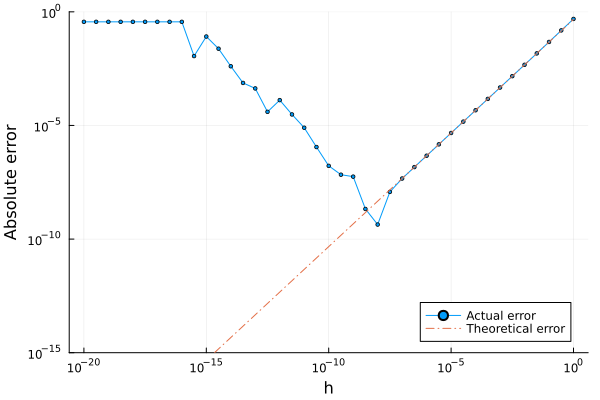

In [61]:
using Plots

f(x) = sin(x)

x0 = 1.2
fp = cos(x0)
fpp = -sin(x0)

#hh = [10.0^i for i in -20:0.5:0] # Array comprehension
hh = logrange(1e-20, 1e0, 41)

fpapprox = [(f(x0+h) - f(x0))/h for h in hh]

#fpapprox = (f.(x0 .+ hh) .- f(x0))./hh
#fpapprox = @. (f(x0 + hh) - f(x0))/hh

abserr = abs.(fpapprox .- fp)

discretization_err = hh*(abs(fpp)/2)

plot(xaxis=:log10, yaxis=:log10, legend=:bottomright)
plot!(hh, abserr, label="Actual error", marker=:circle, markersize=2)
plot!(hh, discretization_err, label="Theoretical error", style=:dashdot)
ylims!(1e-15, 1e0)
xlabel!("h")
ylabel!("Absolute error")

In [63]:
typeof(:circle)

Symbol

In [43]:
@macroexpand @. (f(x0 + hh) - f(x0))/hh

:((/).((-).(f.((+).(x0, hh)), f.(x0)), hh))

In [31]:
[10.0^i for i in -20:0.5:0]

41-element Vector{Float64}:
 1.0e-20
 3.162277660168379e-20
 1.0e-19
 3.162277660168379e-19
 1.0e-18
 3.1622776601683795e-18
 1.0e-17
 3.1622776601683796e-17
 1.0e-16
 3.1622776601683793e-16
 1.0e-15
 3.1622776601683794e-15
 1.0e-14
 ⋮
 3.162277660168379e-6
 1.0e-5
 3.1622776601683795e-5
 0.0001
 0.00031622776601683794
 0.001
 0.0031622776601683794
 0.010000000000000002
 0.03162277660168379
 0.1
 0.31622776601683794
 1.0

---
# 1.3 Algorithm properties
---

## Accuracy

As we have seen above, it is easy to write *mathematically correct* code that produces very inaccurate results.

Accuracy is affected by the following two conditions:

1. **Problem conditioning**  
    Some problems are highly sensitive to small changes in the input: we call such problems **ill-conditioned**. A problem that is not sensitive to small changes in the input is called **well-conditioned**. For example, computing $\tan(x)$ for $x$ near $\pi/2$ is an ill-conditioned problem (**Example 1.5** in Ascher-Greif).
2. **Algorithm stability**  
    An algorithm is called **stable** if it is guaranteed to produce an exact answer to a *slightly perturbed problem*. (**Example 1.6** in Ascher-Greif gives an example of an **unstable algorithm**).

---

## Exercise

Let 

$$ y_n = \int_0^1 \frac{x^n}{x + 10} dx. $$

Then 

$$
y_n + 10y_{n-1} = \int_0^1 \frac{x^n + 10x^{n-1}}{x + 10} dx = \int_0^1 x^{n-1} dx = \frac{1}{n}x^n \Big\rvert_0^1 = \frac1n
$$

and

$$
y_0 = \int_0^1 \frac{1}{x + 10} dx = \ln|x+10| \Big\rvert_0^1 = \ln(11) - \ln(10).
$$

Then use these formulas to numerically compute $y_{30}$.

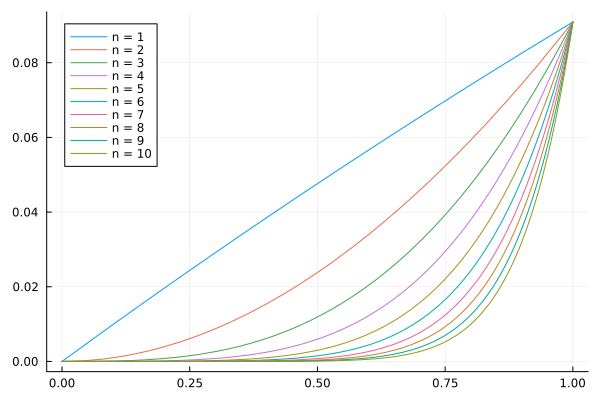

In [68]:
plot()
for n in 1:10
    plot!(x -> x^n/(x+10), 0, 1, label="n = $n")
end
plot!()

In [69]:
using QuadGK

n = 30
integral, error = quadgk(x -> x^n/(x + 10), 0, 1)

(0.002940928704861327, 8.45119305817703e-12)

Therefore, $y_{30} \approx 0.003$.

$$
y_n + 10 y_{n-1} = \frac{1}{n}
$$

$$
y_0 = \ln(11) - \ln(10)
$$

$$
y_n = \frac{1}{n} - 10 y_{n-1}
$$

In [70]:
y0 = log(11) - log(10)

yvals = zeros(30)
yvals[1] = 1 - 10*y0
for n = 2:30
    yvals[n] = 1/n - 10*yvals[n-1]
end
yvals

30-element Vector{Float64}:
       0.04689820195675232
       0.031017980432476833
       0.023153529008564988
       0.01846470991435012
       0.015352900856498819
       0.013137658101678468
       0.011480561840358172
       0.010194381596418278
       0.009167295146928323
       0.00832704853071678
       0.007638605601923115
       0.0069472773141021765
       0.007450303782055162
       ⋮
     916.9927348292546
   -9169.877348292546
   91698.82110197308
 -916988.1655651854
       9.169881699130116e6
      -9.169881694963449e7
       9.169881695363449e8
      -9.169881695324987e9
       9.169881695328691e10
      -9.169881695328334e11
       9.16988169532837e12
      -9.169881695328366e13

In [71]:
yvals[30]

-9.169881695328366e13

This algorithm is *very* **unstable**.

---

## Efficiency

Efficiency of a code is affected by many factors:

1. the rate of convergence of the method
2. the number of arithmetic operations performed
3. how the data in memory is accessed

(See **Example 1.4** in Ascher-Greif for an efficient algorithm for evaluating polynomials: **Horner's rule**.)

---

## Robustness (Reliability)

We want to ensure that our code works under *all possible inputs*, and generates the clear warnings when it is not possible to produce an accurate result for some input.

---